<a href="https://colab.research.google.com/github/madmink/FSDS-Hacktiv8/blob/master/GC5i(latest%20save).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perkenalan

Dibuat Oleh Arry Pandowo, student Full Stack Data Science Batch 01 Hacktiv8 untuk pemenuhan Graded Challenge 5 

> ### Data yang digunakan
Data yang digunakan adalah Credit Fraud Detection dengan dataset yang didownload langsung dari API Kaggle menggunakan google.colab dan command API Kaggle

> ### Tujuan yang ingin dicapai
<ol>
<li>melihat hubungan antar feature didalam data, dan menggali insight sebanyak mungkin dari dataset</li>
<li>membuat model prediktif target Class</li>
<li>menganalisis anomaly atas dataset yang ada serta membandingkan antar class pada target</li>
<ol/>

# Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Setup Kaggle API & Dataset

In [2]:
# JSON API
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (4).json


{'kaggle.json': b'{"username":"arrypo","key":"c1492d92276129ec81940279ce750b58"}'}

In [3]:
# Install API
!pip install -q kaggle

In [4]:
#API Directory
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Data Loading

In [5]:
# Download Directly from Kaggle
!kaggle datasets download -d mlg-ulb/creditcardfraud

creditcardfraud.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
# Directory for downloaded Data
! mkdir creditcard

mkdir: cannot create directory ‘creditcard’: File exists


In [7]:
# Unzip downloaded Data
! unzip creditcardfraud.zip -d creditcardfraud

Archive:  creditcardfraud.zip
replace creditcardfraud/creditcard.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [8]:
df = pd.read_csv('creditcardfraud/creditcard.csv')

In [9]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## Imbalance Label

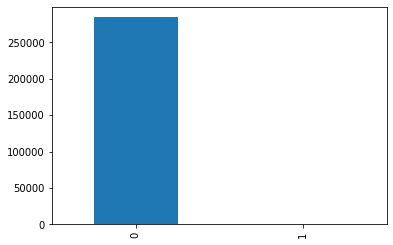

In [11]:
df['Class'].value_counts().plot(kind='bar')

> Imbalance Label terhadap data 0 dan 1 pada Class Target, dibutuhkan analisis lebih lanjut terhadap hal ini

## Informasi Awal

* Data V1-28 sudah melalui tahapan PCA dan telah distandardisasi, Time, amount dan Class belum dilakukan pengolahan lebih lanjut
* Terdapat Imbalance label pada class sebagai target

***

# Data Cleaning

In [12]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Tidak terdapat missing value, data dapat diolah lebih lanjut

# Eksplorasi Data

## Scatterplot V1-28

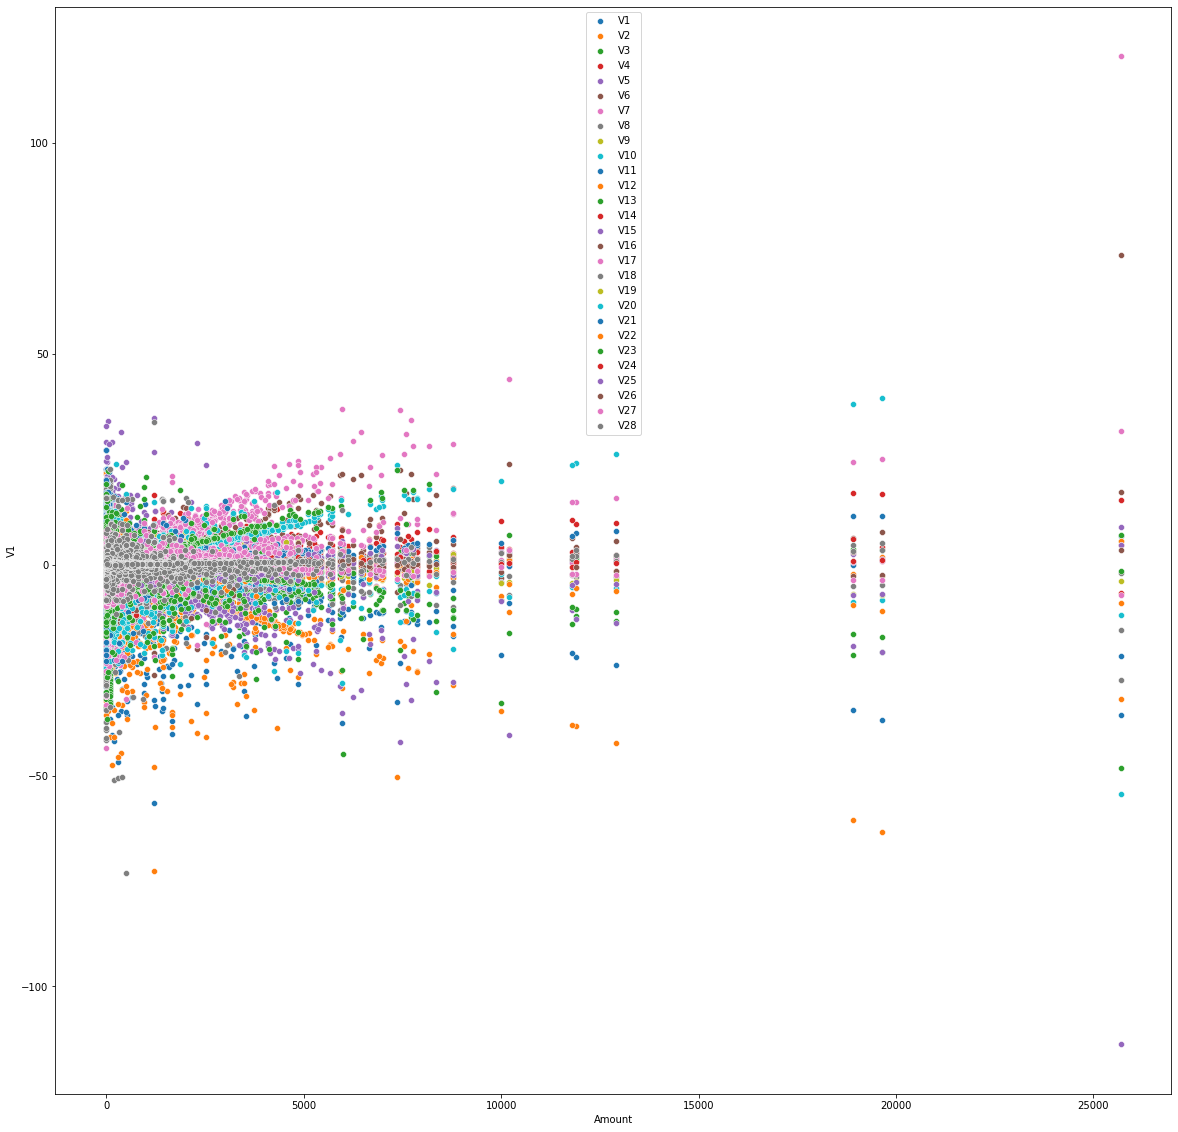

In [13]:
plt.figure(figsize = (20, 20))
sns.scatterplot(data=df,x='Amount',y='V1',label='V1')
sns.scatterplot(data=df,x='Amount',y='V2',label='V2')
sns.scatterplot(data=df,x='Amount',y='V3',label='V3')
sns.scatterplot(data=df,x='Amount',y='V4',label='V4')
sns.scatterplot(data=df,x='Amount',y='V5',label='V5')
sns.scatterplot(data=df,x='Amount',y='V6',label='V6')
sns.scatterplot(data=df,x='Amount',y='V7',label='V7')
sns.scatterplot(data=df,x='Amount',y='V8',label='V8')
sns.scatterplot(data=df,x='Amount',y='V9',label='V9')
sns.scatterplot(data=df,x='Amount',y='V10',label='V10')
sns.scatterplot(data=df,x='Amount',y='V11',label='V11')
sns.scatterplot(data=df,x='Amount',y='V12',label='V12')
sns.scatterplot(data=df,x='Amount',y='V13',label='V13')
sns.scatterplot(data=df,x='Amount',y='V14',label='V14')
sns.scatterplot(data=df,x='Amount',y='V15',label='V15')
sns.scatterplot(data=df,x='Amount',y='V16',label='V16')
sns.scatterplot(data=df,x='Amount',y='V17',label='V17')
sns.scatterplot(data=df,x='Amount',y='V18',label='V18')
sns.scatterplot(data=df,x='Amount',y='V19',label='V19')
sns.scatterplot(data=df,x='Amount',y='V20',label='V20')
sns.scatterplot(data=df,x='Amount',y='V21',label='V21')
sns.scatterplot(data=df,x='Amount',y='V22',label='V22')
sns.scatterplot(data=df,x='Amount',y='V23',label='V23')
sns.scatterplot(data=df,x='Amount',y='V24',label='V24')
sns.scatterplot(data=df,x='Amount',y='V25',label='V25')
sns.scatterplot(data=df,x='Amount',y='V26',label='V26')
sns.scatterplot(data=df,x='Amount',y='V27',label='V27')
sns.scatterplot(data=df,x='Amount',y='V28',label='V28')



1.   Dapat dilihat dari Grafik scatter plot diatas terdapat data outlier dengan jumlah yang tidak terlalu dominan untuk transaksi diatas Amount 5000, data tersebut yang akan dilakukan analisis lebih lanjut 
2.   Seluruh kelompok data (V1-28) memiliki outlier yang merata sehingga untuk memudahkan untuk analisis EDA akan dilakukan per Class Label



## Sebaran data Amount & Time

<Figure size 720x720 with 0 Axes>

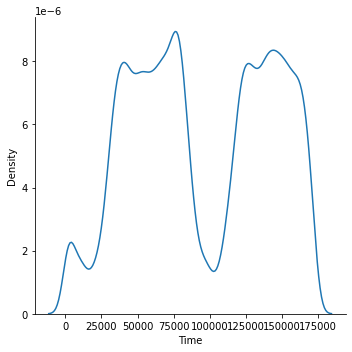

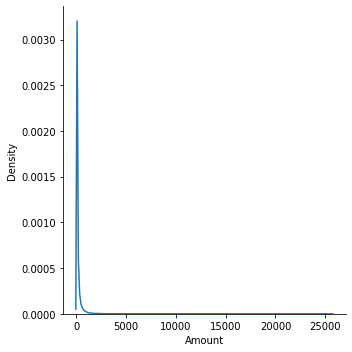

In [14]:
plt.figure(figsize = (10, 10))
sns.displot(data=df , x="Time", kind="kde")
sns.displot(data=df , x="Amount", kind="kde")

* Time memiliki kencenderungan distribusi normal
* Amount memiliki skewness ke kiri dengan jumlah outlier sesuai dengan scatterplot yang ada diatas dengan sebaran data terkonsentrasi pada transaksi dibawah Amount 5000



## Pemisahan data antara Fraud dan Non Fraud

In [15]:
df_no_Fraud = df[df['Class'] == 0]
df_Fraud = df[df['Class'] == 1]

## Sebaran Data Fraud 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


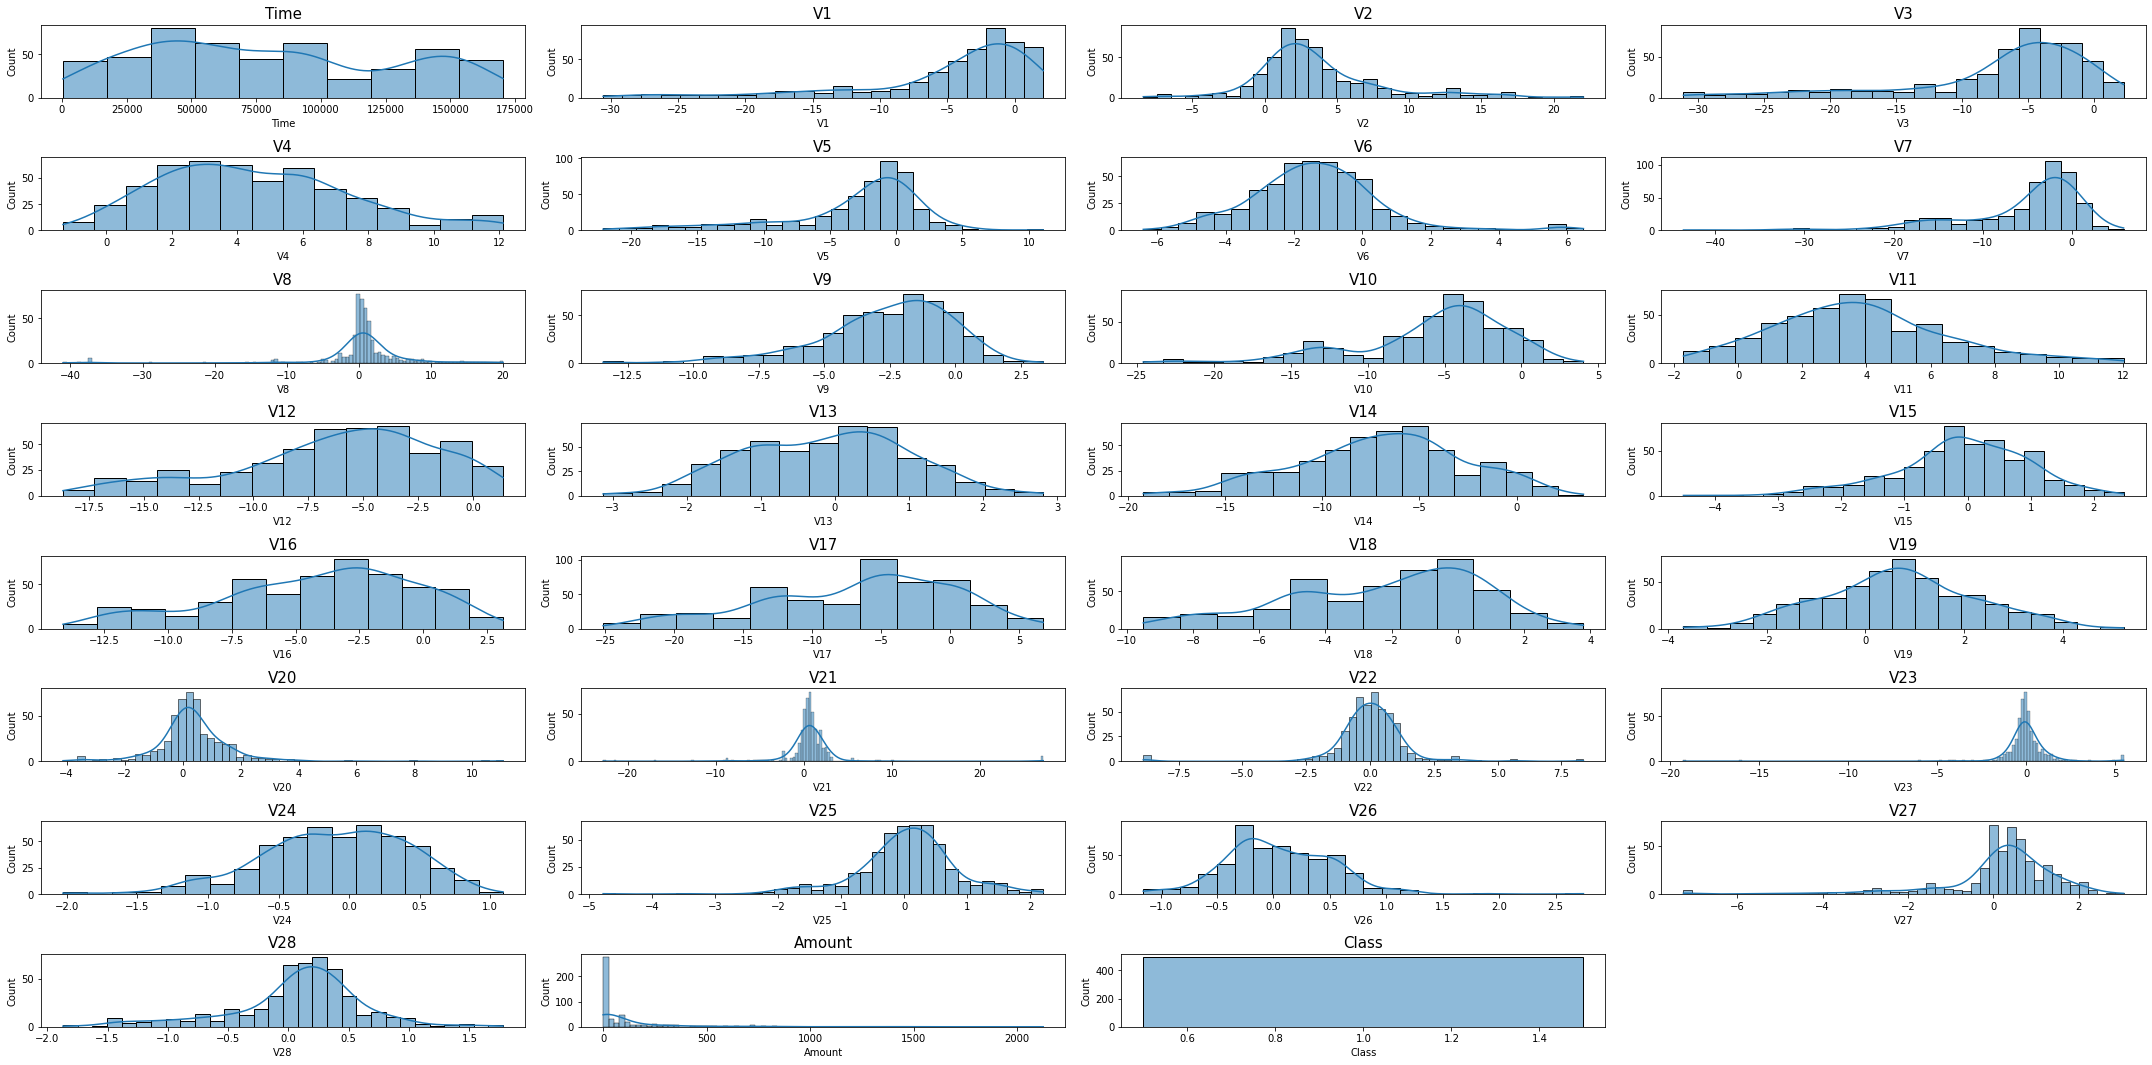

In [16]:
cols_Fraud = list(df_Fraud)
plt.figure(figsize = (30, 20))
for i in range(len(cols_Fraud)):
    plt.subplot(len(cols_Fraud)//3+1, 4, i + 1)
    sns.histplot(df_Fraud[cols_Fraud[i]], kde=True)
    plt.title(cols_Fraud[i], fontsize = 15)
    
plt.tight_layout()
plt.show()

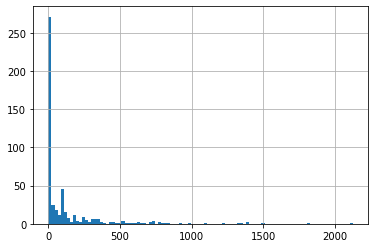

In [17]:
df_Fraud["Amount"].loc[df_Fraud["Amount"] < 5000].hist(bins=100);

Dari distribusi data diatas didapat informasi sebagai berikut : 
* konsentrasi outlier atau anomaly terdapat pada V1, V2, V3, V7, V20, V23, V24 V27 dan Amount

## Data Non Fraud

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


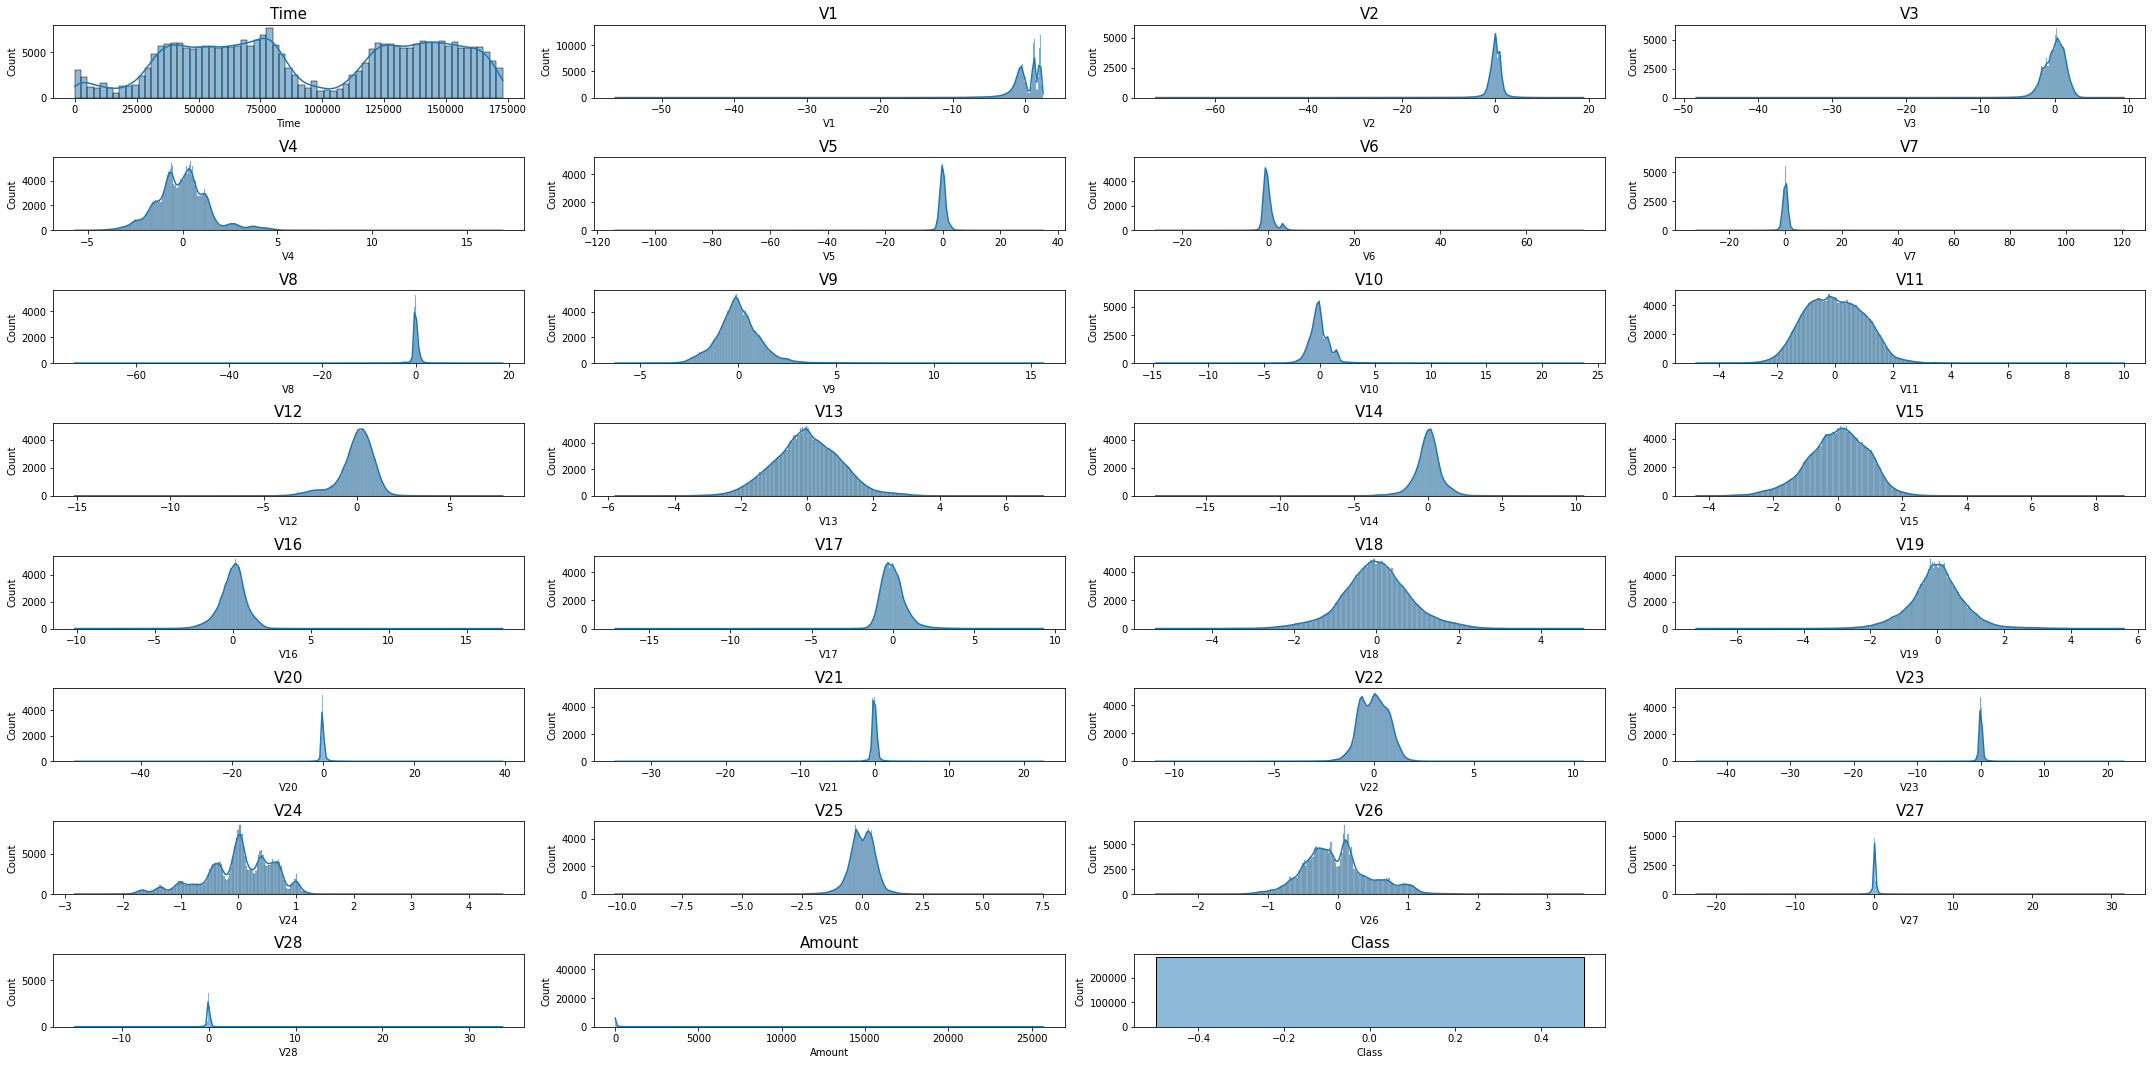

In [18]:
cols_no_Fraud = list(df_no_Fraud.columns)
plt.figure(figsize = (30, 20))
for i in range(len(cols_no_Fraud)):
    plt.subplot(len(cols_no_Fraud)//3+1, 4, i + 1)
    sns.histplot(df_no_Fraud[cols_no_Fraud[i]], kde=True)
    plt.title(cols_no_Fraud[i], fontsize = 15)
    
plt.tight_layout()
plt.show()

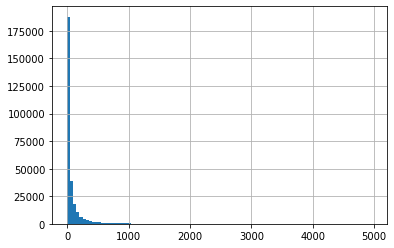

In [19]:
df_no_Fraud["Amount"].loc[df_no_Fraud["Amount"] < 5000].hist(bins=100);

# Data Preprocessing

## Multicolinearity Test

In [20]:
vif_data = pd.DataFrame()
vif_data["feature"] = df.drop(['Class', 'Time'], axis=1).columns
vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.drop(['Class', 'Time'], axis=1).columns))]
vif_data

,feature,VIF
0,V1,2.339858
1,V2,1.638237
2,V3,3.900804
3,V4,1.321018
4,V5,1.172479
5,V6,2.764441
6,V7,1.528629
7,V8,2.603517
8,V9,1.098591
9,V10,1.037715


> Multicolinearity rendah antar feature sehingga data aman untuk diolah lebih lanjut

# Pendefinisian & Pelatihan Model

## Scallling dengan Min-Max Scaller

In [21]:
import matplotlib.patches as mpatches
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df['scaled_amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

Dikarenakan pergerakan data yang cenderung konstan walaupun memiliki variance yang cukup besar, dipilih MinMaxScaler sebagai alternatif data scaling 

* dilakukan standard scaler atas data Amount dan Time yang belum di standardisasi sesuai dengan informasi pada laman kaggle

In [22]:
X=df.drop(['Class'], axis=1)
y=df['Class']


In [23]:
y.value_counts()

0    284315
1       492
Name: Class, dtype: int64

## Cluster PCA

In [28]:
from sklearn.decomposition import PCA
X_pca = PCA(n_components=3, random_state=42).fit_transform(X.values)

Pendefinisian Model dan Fit ke dalam model dengan n_components 2 sebagai tebakan awal

## AIC & BIC Score

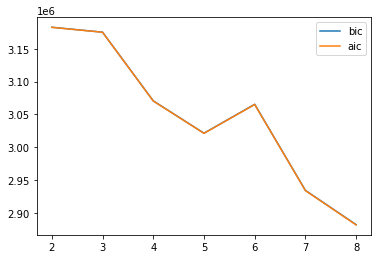

In [30]:
from sklearn.mixture import GaussianMixture

n_gauss=[2,3,4,5,6,7,8]
bic=[]
aic=[]
for g in n_gauss:
    gm=GaussianMixture(n_components=g,covariance_type='tied').fit(X_pca)
    bic.append(gm.bic(X_pca))
    aic.append(gm.aic(X_pca))

plt.plot(n_gauss,bic,label='bic')
plt.plot(n_gauss,aic,label='aic')
plt.legend()

In [ ]:
gausMix = GaussianMixture(n_components=8).fit(df)

Sesuai dengan AIC dan BIC Score maka dilakukan penetapan n_components 8

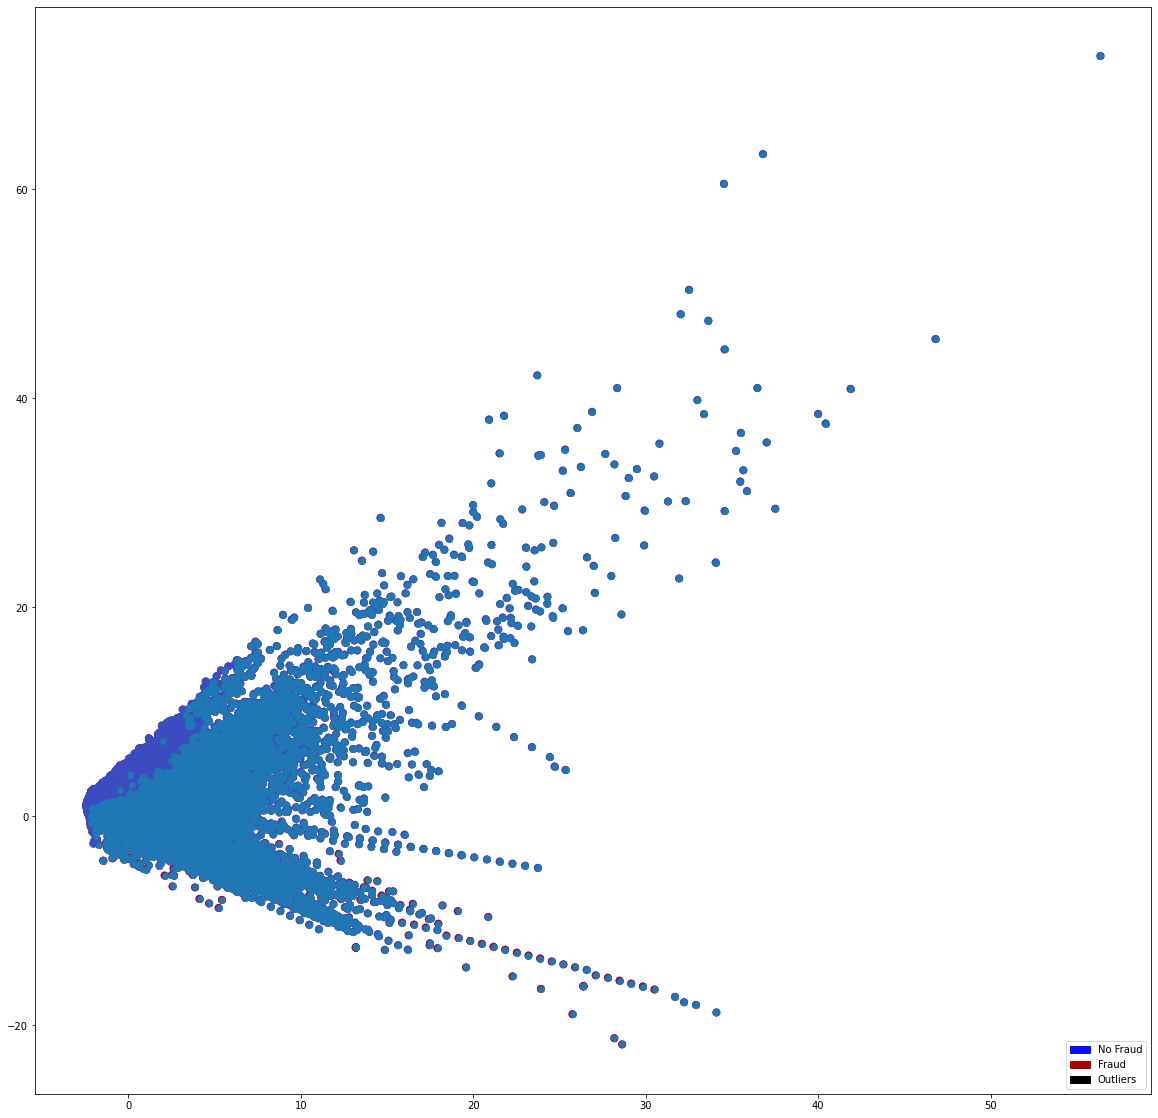

In [31]:


plt.figure(figsize = (20, 20))
plt.scatter(X_pca[:,0], X_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
plt.scatter(X_pca[:,0], X_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
scores = gausMix.score_samples(df)
thresh = np.quantile(scores, 0.03)
index = np.where(scores <= thresh)
outliers = X_pca[index]
plt.scatter(outliers[:,0],outliers[:,1], cmap='coolwarm', label ='Outliers')



blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')
black_patch = mpatches.Patch(color='#000000', label='Outliers')
plt.legend(handles=[blue_patch, red_patch, black_patch], loc='lower right')


> dikarenakan adanya imbalance label, Fraud tidak terlihat dalam clustering PCA, maka akan dilakukan analisis dengan tahapan selanjutnya dengan menggunakan 3d scatterplot

## 3d view of scatter plot

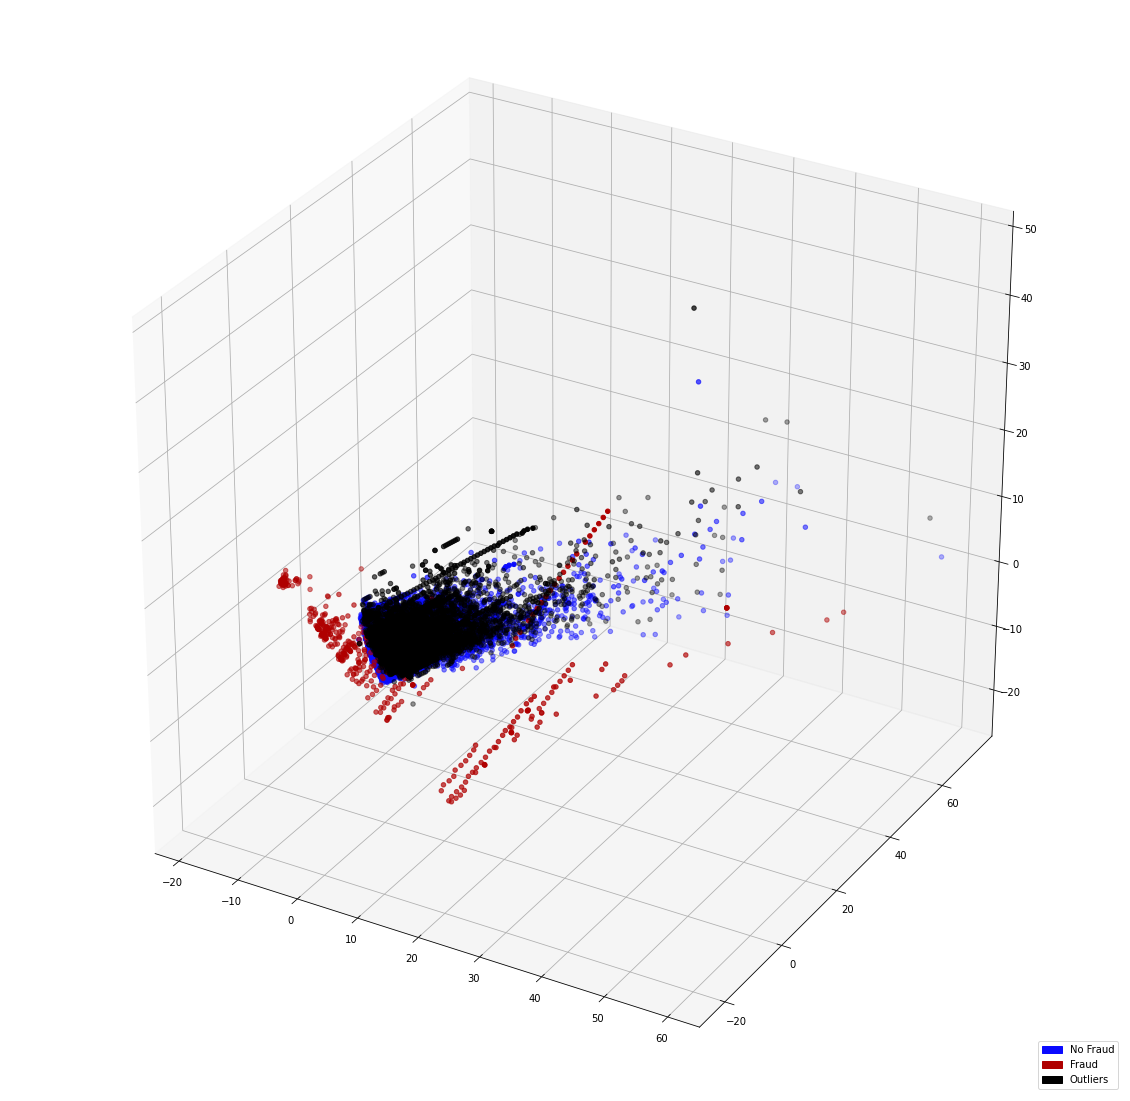

In [32]:
from mpl_toolkits.mplot3d import Axes3D
X3D_no=PCA(n_components=3).fit_transform(X.loc[df[df.Class== 0].index.values])
X3D_yes=PCA(n_components=3).fit_transform(X.loc[df[df.Class== 1].index.values])
fig = plt.figure(figsize = (20, 20))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X3D_yes[:,0],X3D_yes[:,1],X3D_yes[:,2], color='#AF0000')
ax.scatter(X3D_no[:,0],X3D_no[:,1],X3D_no[:,2], color='#0A0AFF')
ax.scatter(outliers[:,0],outliers[:,1],outliers[:,2], color='#000000')

plt.legend(handles=[blue_patch, red_patch, black_patch], loc='lower right')


Dapat terlihat jelas Outlier terdapat ditengah tengah diantara Fraud dan No Fraud, hal tersebut mengakibatkan tidak terlihatnya outlier pada grafik 2d

Hal tersebut dikarenakan : 
* Data Outlier memiliki kriteria threshold yang berada pada 3% dari X_PCA sehingga data outlier berada didalam plot PCA
* Data Anomaly terbentuk berdasarkan pola outlier yang dihasilkan dari besarnya variance pada fitur tertentu pada Class No Fraud ataupun Fraud

# Model Inference

In [33]:
from google.colab import files
files.upload()

Saving inf12314.csv to inf12314 (1).csv


{'inf12314.csv': b'Time;V1;V2;V3;V4;V5;V6;V7;V8;V9;V10;V11;V12;V13;V14;V15;V16;V17;V18;V19;V20;V21;V22;V23;V24;V25;V26;V27;V28;Amount;Class\r\n1;0.16648011335321;0.16648011335321;0.16648011335321;0.448154078460911;0.0600176492822243;-0.0823608088155687;-0.0788029833323113;0.0851016549148104;-0.255425128109186;-0.166974414004614;0.16648011335321;0.16648011335321;0.48909501589608;-0.143772296441519;0.635558093258208;0.463917041022171;-0.114804663102346;-0.183361270123994;-0.145783041325259;-0.0690831352230203;-0.225775248033138;-0.638671952771851;0.16648011335321;-0.339846475529127;0.167170404418143;0.125894532368176;-0.00898309914322813;0.0147241691924927;2.69;0\r\n2;0.16648011335321;0.16648011335321;0.16648011335321;0.448154078460911;0.0600176492822243;-0.0823608088155687;-0.0788029833323113;0.0851016549148104;-0.255425128109186;-0.166974414004614;0.16648011335321;0.16648011335321;0.48909501589608;-0.143772296441519;0.635558093258208;0.463917041022171;-0.114804663102346;-0.183361270123

In [34]:
df_inference =pd.read_csv('inf12314.csv', sep=';')

In [35]:
df_inference

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1,0.16648,0.16648,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,0.16648,0.166480,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.166480,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
1,2,0.16648,0.16648,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,0.16648,0.166480,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.339846,-0.225775,-0.638672,0.101288,-0.339846,0.125895,0.125895,-0.008983,0.014724,3.00,1
2,3,0.16648,0.16648,-0.078803,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,0.16648,-0.143772,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.339846,-0.638672,0.101288,0.167170,0.167170,0.125895,-0.008983,0.014724,4.00,0
3,4,0.16648,0.16648,0.166480,0.448154,0.166480,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,0.16648,0.166480,0.166480,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,0.101288,-0.225775,-0.638672,0.101288,-0.225775,0.167170,0.167170,-0.008983,0.014724,6.00,1
4,5,0.16648,0.16648,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,0.085102,0.16648,0.166480,0.489095,-0.143772,0.635558,0.463917,0.463917,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,-0.008983,-0.008983,0.014724,8.00,1


In [36]:
df_inference.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    5 non-null      int64  
 1   V1      5 non-null      float64
 2   V2      5 non-null      float64
 3   V3      5 non-null      float64
 4   V4      5 non-null      float64
 5   V5      5 non-null      float64
 6   V6      5 non-null      float64
 7   V7      5 non-null      float64
 8   V8      5 non-null      float64
 9   V9      5 non-null      float64
 10  V10     5 non-null      float64
 11  V11     5 non-null      float64
 12  V12     5 non-null      float64
 13  V13     5 non-null      float64
 14  V14     5 non-null      float64
 15  V15     5 non-null      float64
 16  V16     5 non-null      float64
 17  V17     5 non-null      float64
 18  V18     5 non-null      float64
 19  V19     5 non-null      float64
 20  V20     5 non-null      float64
 21  V21     5 non-null      float64
 22  V22   

In [38]:
df_inference_scl = scaler.fit_transform(df_inference)
predict1 = gausMix.predict(df_inference_scl)

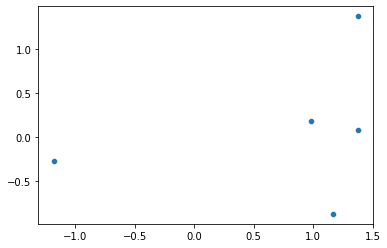

In [39]:
sns.scatterplot(x=X_pca[df_inference.index,0], y=X_pca[df_inference.index,1])

Model berhasil melakukan penetapan posisi pada X_pca yang merupakan sebaran dataset utama

# Kesimpulan
* model berhasil melakukan prediksi sesuai dengan n-components yang ditetapkan yaitu 3
* model telah berhasil melakukan pemisahan antara data outlier dan class namun harus dengan bantuan sebaran grafik 3D
* Class baru dapat dibuat atas data outlier dikarenakan telah membentuk sebuah pola khusus yang berhasil dibaca oleh Model